In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def hiv(x,t):
    kr1 = 1e5
    kr2 = 0.1
    kr3 = 2e-7
    kr4 = 0.5
    kr5 = 5
    kr6 = 100
    
    h = x[0]
    i = x[1]
    v = x[2]
    p = kr3 * h * v
    dhdt = kr1 - kr2 * h - p 
    didt = p - kr4*i
    dvdt = -p -kr5 * v + kr6*i
    return [dhdt,didt,dvdt]



In [ ]:
x0 = [1e6,0,100]
t = np.linspace(0,15,1000)
x = odeint(hiv,x0,t)

In [ ]:
h = x[:,0]
i = x[:,1]
v = x[:,2]

plt.semilogy(t,h)
plt.semilogy(t,i)
plt.semilogy(t,v)

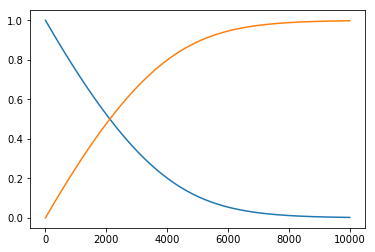

In [55]:
Vmax = 2.0
Km = 0.5

def df(c,t):
    s = c[0]
    p = c[1]
    dsdt = -Vmax*s / (Km + s)
    dpdt = Vmax *s / (Km + s)
    return [dsdt,dpdt]

c0 = [1,0]
t = np.linspace(0,2,10000)
sol = odeint(df,c0,t)
plt.plot(sol)


In [53]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

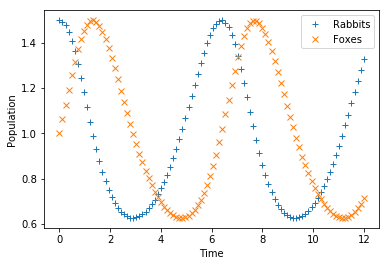

In [54]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

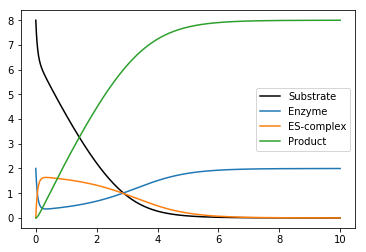

In [52]:
# E + S = ES -> E + P
# kf = 0.001, kr = 0.0001, kcat = 0.1, S0=500, E0=200, P0=ES0=0, evaluated to t=50, 
def df(c,t):
    s =  c[0]
    es = c[1]
    p = c[2]
    e = c[3]
    
    kf = 2
    kr = 1
    kcat = 1.5
    
    ds = -kf*e*s + kr*es
    des = kf*e*s - kr*es - kcat*es
    dp = kcat*es
    de = -kf*e*s + kr*es + kcat*es
    return [ds, des, dp , de]
    


# S,P,E,ES
c0 = [8,0,0,2] 
ts = np.linspace(0, 10,10000)
sol = odeint(df,c0,ts)

dsdt = sol[:,0]
desdt = sol[:,1]
dpdt = sol[:,2]
dedt = sol[:,3]

plt.plot(ts, dsdt, c='k', label="Substrate")
plt.plot(ts, dedt, label="Enzyme")
plt.plot(ts, desdt, label="ES-complex")
plt.plot(ts, dpdt, label="Product")
plt.legend()